In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
dataset = pd.read_csv("diabetes.csv")
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Text(0.5, 1.0, 'correlation heatmap')

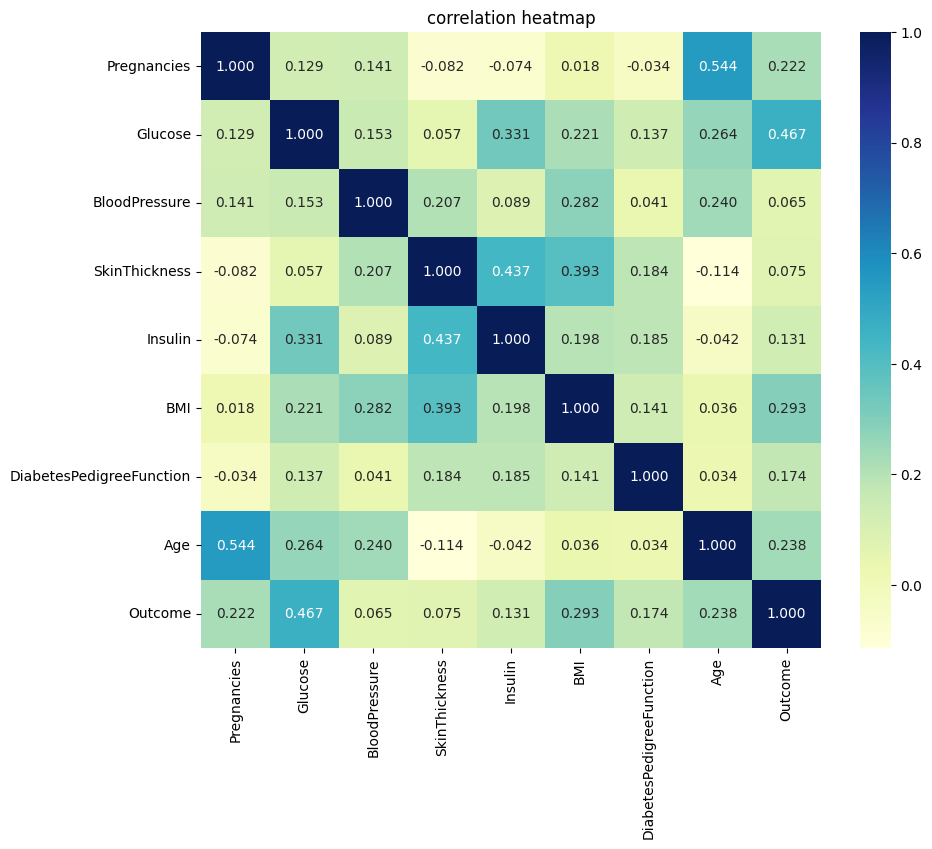

In [3]:
plt.figure(figsize =(10,8))
sns.heatmap(dataset.corr(), annot = True, fmt=".3f", cmap = "YlGnBu")
plt.title("correlation heatmap")

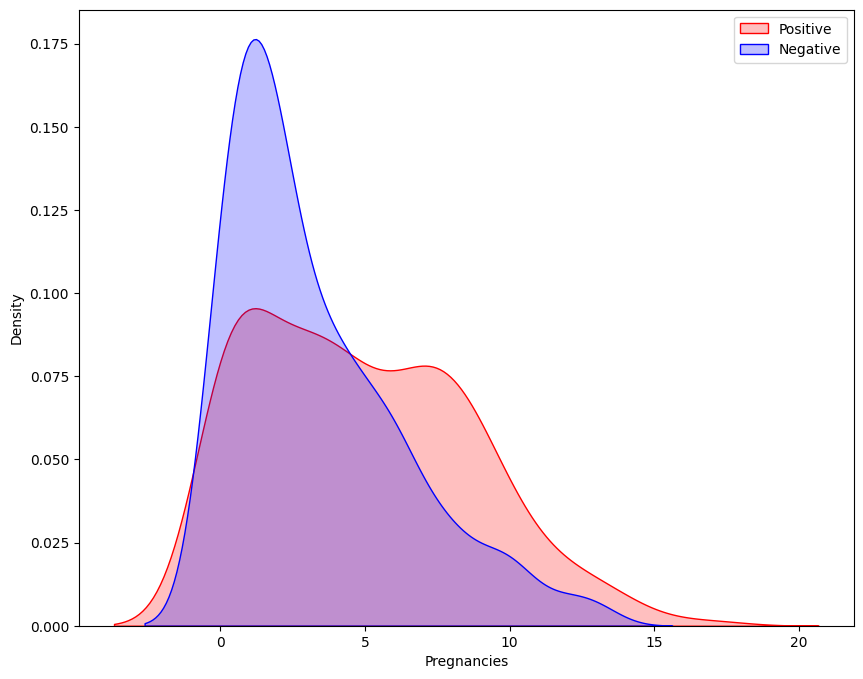

In [4]:
plt.figure(figsize=(10,8))
kde = sns.kdeplot(dataset["Pregnancies"][dataset["Outcome"]==1], color = "Red",fill = True)
kde = sns.kdeplot(dataset["Pregnancies"][dataset["Outcome"]==0], color = "Blue", fill = True)
kde.set_xlabel("Pregnancies")
kde.set_ylabel("Density")
kde.legend(["Positive","Negative"])

<Axes: xlabel='Outcome', ylabel='Glucose'>

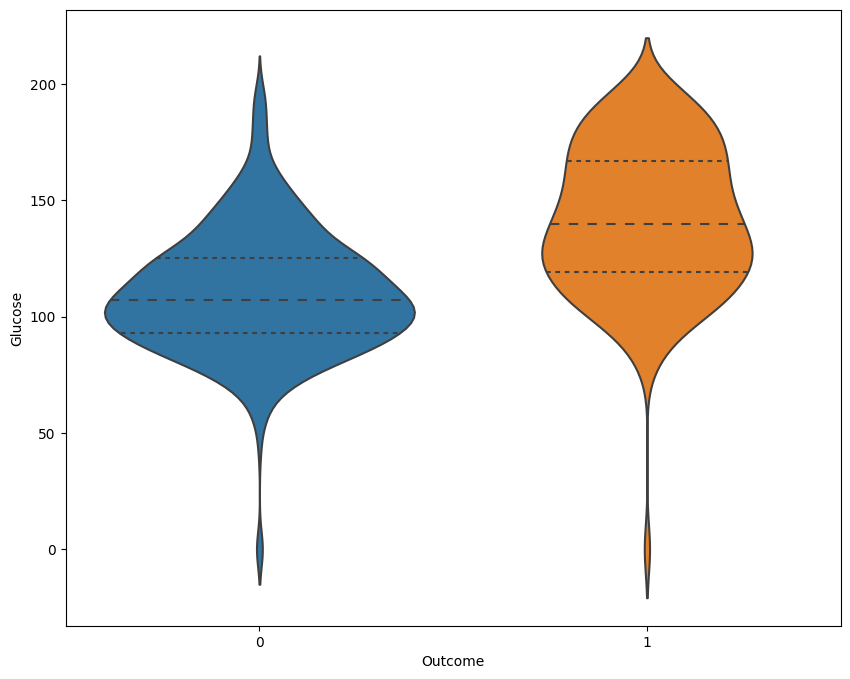

In [5]:
plt.figure(figsize = (10,8))
sns.violinplot(data=dataset , x = "Outcome", y ="Glucose", split = True , inner = "quart", linewidht= 2)

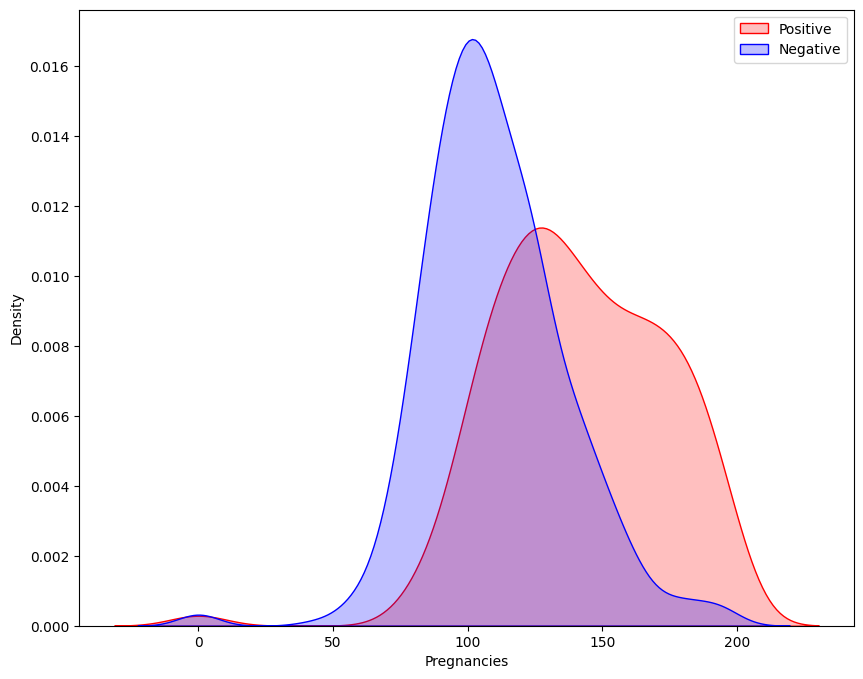

In [6]:
plt.figure(figsize=(10,8))
kde = sns.kdeplot(dataset["Glucose"][dataset["Outcome"]==1], color = "Red",fill = True)
kde = sns.kdeplot(dataset["Glucose"][dataset["Outcome"]==0], color = "Blue", fill = True)
kde.set_xlabel("Pregnancies")
kde.set_ylabel("Density")
kde.legend(["Positive","Negative"])

In [7]:
dataset["Glucose"] = dataset["Glucose"].replace(0, dataset["Glucose"].median())
dataset["BloodPressure"] = dataset["BloodPressure"].replace(0, dataset["BloodPressure"].median())
dataset["BMI"] = dataset["BMI"].replace(0, dataset["BMI"].mean())
dataset["SkinThickness"] = dataset["SkinThickness"].replace(0, dataset["SkinThickness"].mean())
dataset["Insulin"] = dataset["Insulin"].replace(0, dataset["Insulin"].mean())


In [8]:
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.000000,79.799479,33.6,0.627,50,1
1,1,85,66,29.000000,79.799479,26.6,0.351,31,0
2,8,183,64,20.536458,79.799479,23.3,0.672,32,1
3,1,89,66,23.000000,94.000000,28.1,0.167,21,0
4,0,137,40,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48.000000,180.000000,32.9,0.171,63,0
764,2,122,70,27.000000,79.799479,36.8,0.340,27,0
765,5,121,72,23.000000,112.000000,26.2,0.245,30,0
766,1,126,60,20.536458,79.799479,30.1,0.349,47,1


In [9]:
x = dataset.drop(["Outcome"], axis = 1)
y = dataset["Outcome"]

In [10]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [11]:
#splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state= 42)

In [13]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
464,10,115,98,20.536458,79.799479,24.0,1.022,34
223,7,142,60,33.000000,190.000000,28.8,0.687,61
393,4,116,72,12.000000,87.000000,22.1,0.463,37
766,1,126,60,20.536458,79.799479,30.1,0.349,47
570,3,78,70,20.536458,79.799479,32.5,0.270,39
...,...,...,...,...,...,...,...,...
71,5,139,64,35.000000,140.000000,28.6,0.411,26
106,1,96,122,20.536458,79.799479,22.4,0.207,27
270,10,101,86,37.000000,79.799479,45.6,1.136,38
435,0,141,72,20.536458,79.799479,42.4,0.205,29


In [14]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

In [15]:
training_accuracy = []
test_accuracy = []
for n_neighbors in range(1,11):
    knn = KNeighborsClassifier(n_neighbors)
    knn.fit(X_train,y_train)
    
    #check accuracy score
    training_accuracy.append(knn.score(X_train,y_train))
    test_accuracy.append(knn.score(X_test,y_test))

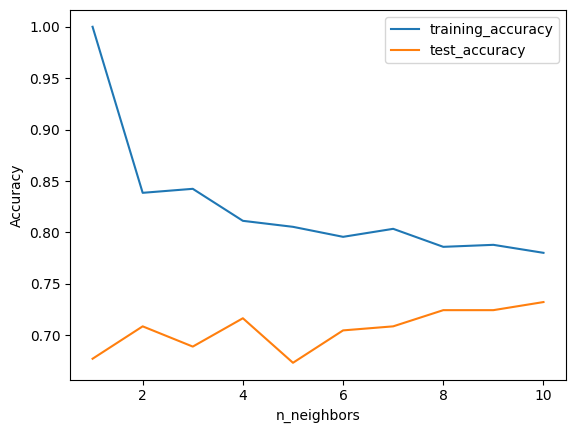

In [16]:
plt.plot(range(1,11) , training_accuracy , label = "training_accuracy")
plt.plot(range(1,11) , test_accuracy , label = "test_accuracy")
plt.xlabel("n_neighbors")
plt.ylabel("Accuracy")
plt.legend()

In [17]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,y_train)
print(knn.score(X_train,y_train),": Training_accuracy")
print(knn.score(X_test,y_test),": Test_accuracy")

0.7879377431906615 : Training_accuracy
0.7244094488188977 : Test_accuracy


In [18]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0,max_depth = 6)
dt.fit(X_train,y_train)
print(dt.score(X_train,y_train),": Training_accuracy")
print(dt.score(X_test,y_test),": Test_accuracy")

0.857976653696498 : Training_accuracy
0.7401574803149606 : Test_accuracy


In [19]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train,y_train)
print(mlp.score(X_train,y_train),": Training_accuracy")
print(mlp.score(X_test,y_test),": Test_accuracy")

0.7509727626459144 : Training_accuracy
0.6811023622047244 : Test_accuracy


In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)

In [21]:
mlp1 = MLPClassifier(random_state=0)
mlp1.fit(X_train_scaled,y_train)
print(mlp1.score(X_train_scaled,y_train),": Training_accuracy")
print(mlp1.score(X_test_scaled,y_test),": Test_accuracy")

0.8326848249027238 : Training_accuracy
0.7322834645669292 : Test_accuracy
